# **Analsís de productos vendidos**

### **1. Importación de datos**



In [9]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Explorar el conjunto de datos
tienda.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

### **2. Análisis de facturación**



#### Función de facturación total

Creamos dos funciones diferentes con el mismo proposito. Para la primera opción creamos una función que solo suma todo el conjunto datos de una lista. Para la segunda creamos una función que hace lo mismo que la primera, pero con la gran diferencia de que lo hace dentro de listas de listas.

In [ ]:
# Opción 1: Sumar lista por separado
def suma_facturacion(lista):
    suma_precios = 0
    for precio in lista:
        suma_precios += precio
    return suma_precios

In [5]:
# Opción 2: Sumas listas en lista de listas
def suma_facturacion2(lista_listas):
    lista_suma = list(sum(lista) for lista in lista_listas)
    return lista_suma

####  Lista de precios de productos vendidos por tienda

Creamos listas solo con los precios de productos vendidos por tienda

In [7]:
Ingreso_tienda = list(tienda["Precio"]) # Accedemos solo a Precio de productos y los guardamos en lista
Ingreso_tienda2 = list(tienda2["Precio"])
Ingreso_tienda3 = list(tienda3["Precio"])
Ingreso_tienda4 = list(tienda4["Precio"])

NameError: name 'tienda' is not defined

#### Mostramos los ingresos por cada tienda

- Primera opción

In [ ]:
ingreso_total = suma_facturacion(Ingreso_tienda)
ingreso_total2 = suma_facturacion(Ingreso_tienda2)
ingreso_total3 = suma_facturacion(Ingreso_tienda3)
ingreso_total4 = suma_facturacion(Ingreso_tienda4)

ingresos = {"Tienda 1" : ingreso_total, "Tienda 2": ingreso_total2, "Tienda 3": ingreso_total3, "Tienda 4": ingreso_total4}
ingresos = pd.DataFrame(ingresos) # Creamos un dataframe con los datos de facturacion por tienda
print(ingresos)


NameError: name 'suma_facturacion' is not defined

- Segunda opción

dict

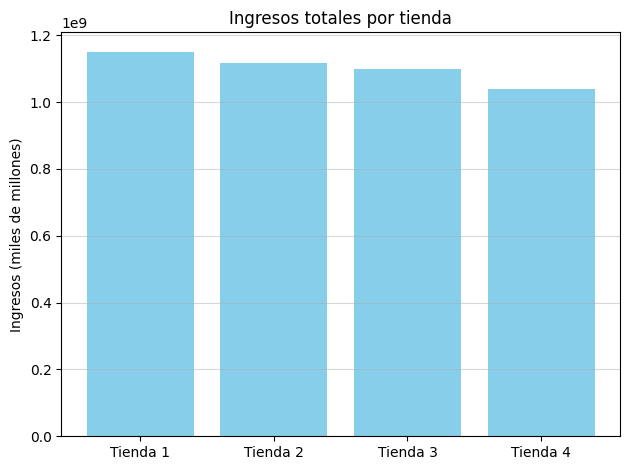

In [ ]:
lista_ingresos = [Ingreso_tienda, Ingreso_tienda2,Ingreso_tienda3, Ingreso_tienda4] # Creamos una lsita de listas
lista_ingresos_totales = suma_facturacion2(lista_ingresos)
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Creamos una figura para graficar los datos de ingresos por tienda
plt.Figure()

plt.bar(tiendas, lista_ingresos_totales, color = "skyblue")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos (miles de millones)")
plt.savefig('ingresos_por_tienda.png')
plt.tight_layout()
plt.grid(axis='y', linestyle='-', alpha=0.5)

### **3. Ventas por categoría**

#### Funcion categorias

Esta funcion obtiene la cantidad de ventas por categorias y ademas, ordena los datos por categoria y por ventas. Los productos con categoria mas vendida se mueven hacia arriba, mientras, los productos con menor ventas son movidos hacia abajo

In [ ]:
def ventas_categoria(tienda_categoria):
    categorias = tienda_categoria["Categoría del Producto"].unique()
    tamano_categorias= tienda_categoria.groupby("Categoría del Producto").size().sort_values( ascending= False)
    ordenado_categorias=tienda_categoria.sort_values("Categoría del Producto", ascending= False)
    return tamano_categorias, ordenado_categorias

#### Mostramos los resultados

Categorias mas vendidas por tienda{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64, 'Tienda 4': Categoría del Producto
Muebles                    480
Electrón

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


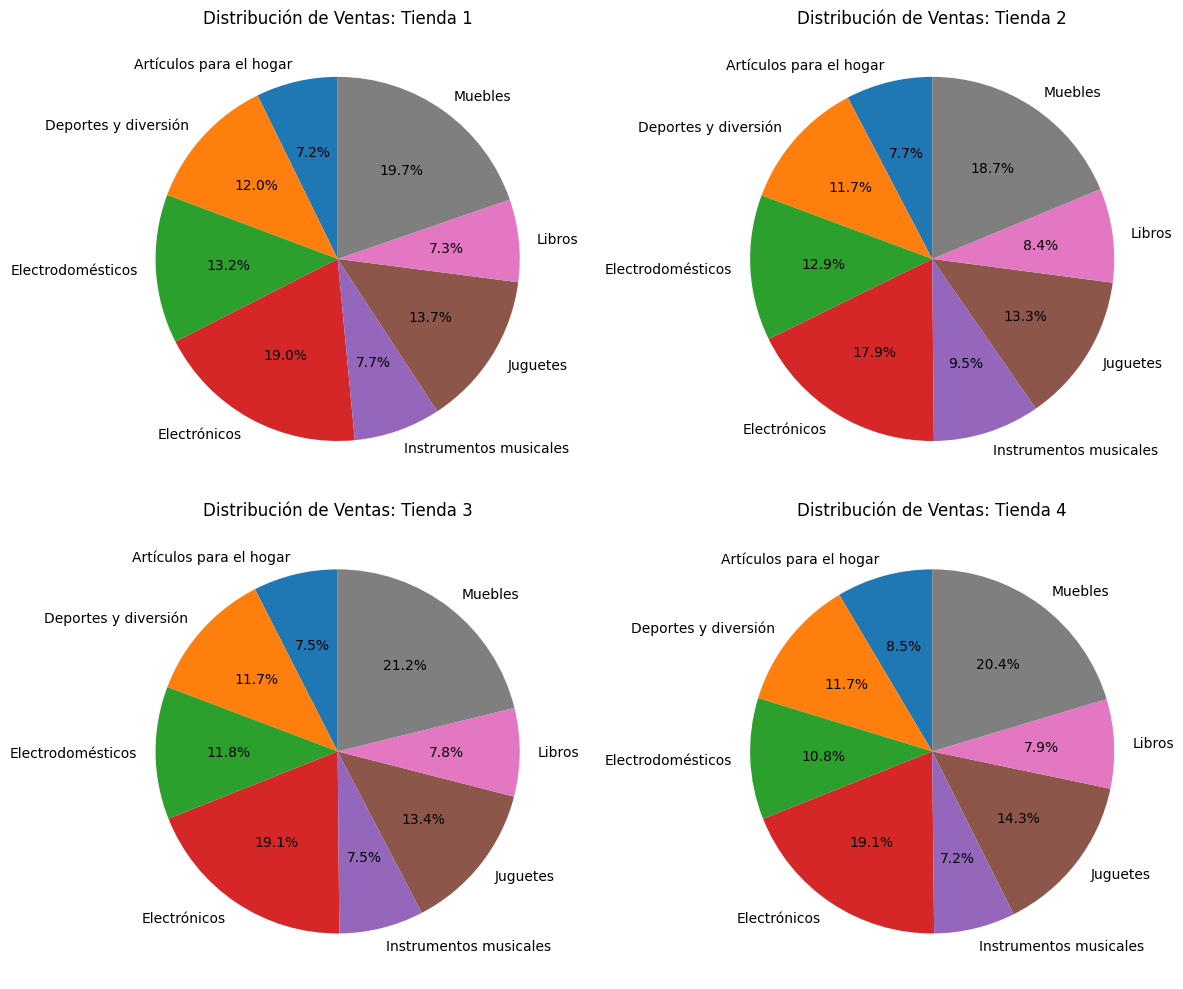

In [ ]:
n_ventas1, ordenado_categoria1 = ventas_categoria(tienda)
n_ventas2, ordenado_categoria2 = ventas_categoria(tienda2)
n_ventas3, ordenado_categoria3 = ventas_categoria(tienda3)
n_ventas4, ordenado_categoria4 = ventas_categoria(tienda4)

topventas = {"Tienda 1": n_ventas1, "Tienda 2": n_ventas2, "Tienda 3":n_ventas3, "Tienda 4":n_ventas4}
print(f"Categorias mas vendidas por tienda{topventas}") # Aqui mostramos las ventas por producto de cada tienda de mayor a menor
df_topventas = pd.DataFrame(topventas) # Creamos una DataFrame para mostrar un tabla con las ventas por producto de cada tienda
print(df_topventas)

# 3. Visualización: Gráficos de Pastel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
tiendas = df_topventas.columns

for i, tienda_nombre in enumerate(tiendas):
    ax = axes[i]
    datos_tienda = df_topventas[tienda_nombre]
    
    ax.pie(datos_tienda, labels=datos_tienda.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribución de Ventas: {tienda_nombre}')

plt.tight_layout()
plt.savefig('ventas_pastel_tiendas.png')

print(df_topventas)

### **4. Calificación promedio de la tienda**


#### Funcion de calcificacion promedio

In [ ]:
def promedio_calificacion(tienda_cal):
    suma_cal = 0
    for calificacion in tienda_cal:
        suma_cal += calificacion
    promedio = suma_cal/len(tienda_cal)
    return promedio

#### Lista de calficicaciones

In [ ]:
calificacion_tienda1 = list(tienda["Calificación"])
calificacion_tienda2 = list(tienda2["Calificación"])
calificacion_tienda3 = list(tienda3["Calificación"])
calificacion_tienda4 = list(tienda4["Calificación"])
promedio1 = promedio_calificacion(calificacion_tienda1)
promedio2 = promedio_calificacion(calificacion_tienda2)
promedio3 = promedio_calificacion(calificacion_tienda3)
promedio4 = promedio_calificacion(calificacion_tienda4)

print(promedio1, promedio2, promedio3, promedio4)

3.976685036032217 4.037303942348453 4.048325561678677 3.9957591178965224


### **5. Productos más y menos vendidos**

#### Función venta de productos

In [ ]:
def ventas_productos(tienda_p):
    categorias = tienda_p["Producto"].unique()
    cantidad_producto = tienda_p.groupby("Producto").size().sort_values( ascending= False)
    ordenado_productos=tienda_p.sort_values("Producto", ascending= False)
    return cantidad_producto, ordenado_productos

#### Mostramos los resultados

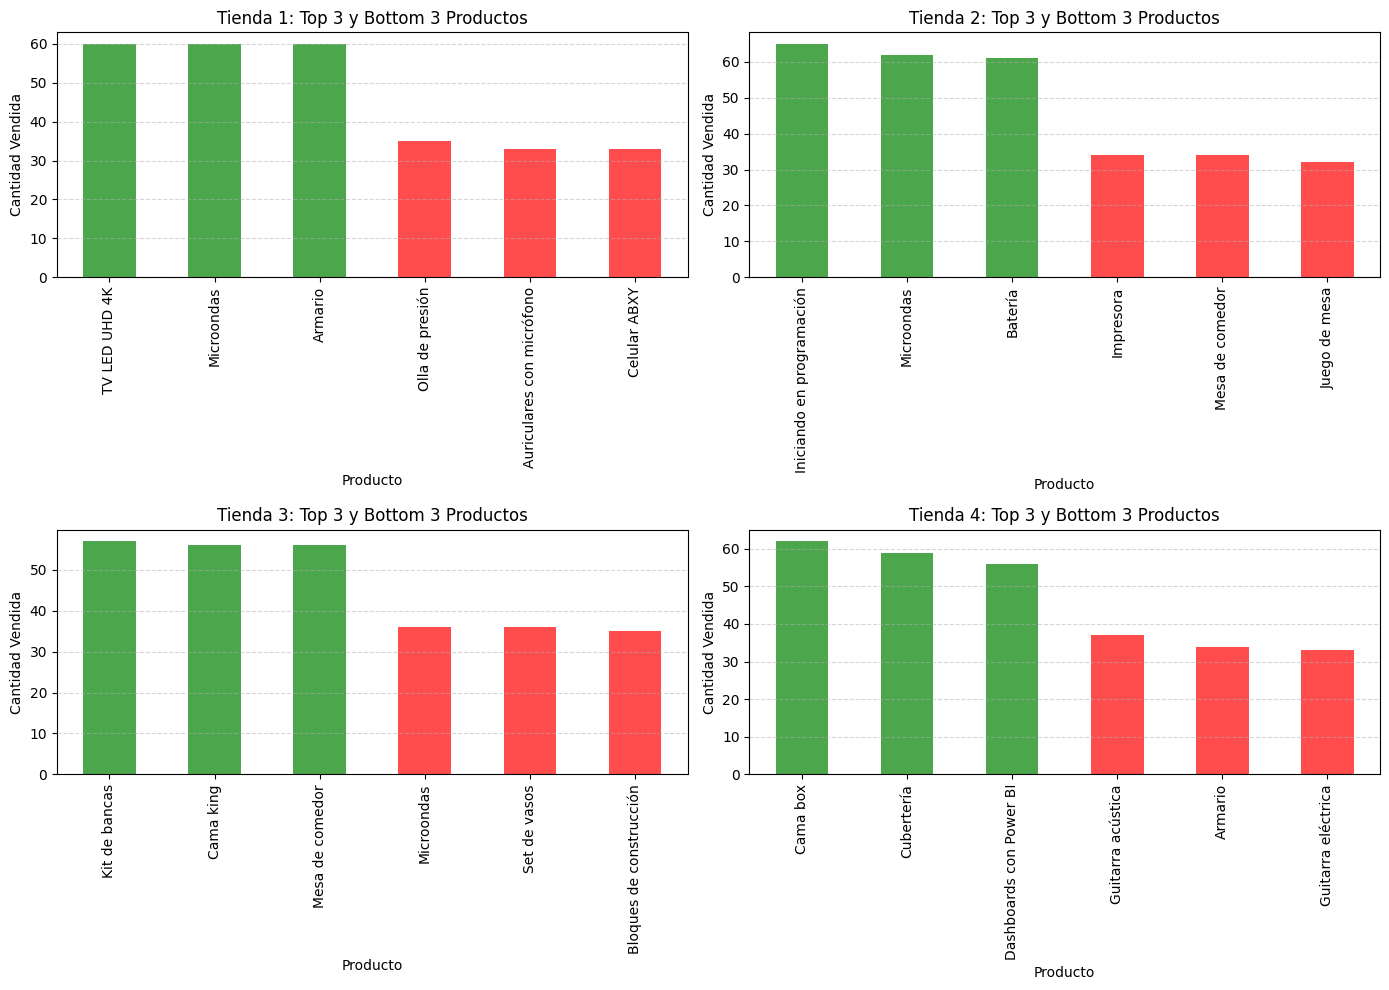

In [ ]:
nventas1_p, ordenado_categoria1_p = ventas_productos(tienda)
nventas2_p, ordenado_categoria2_p = ventas_productos(tienda2)
nventas3_p, ordenado_categoria3_p = ventas_productos(tienda3)
nventas4_p, ordenado_categoria4_p = ventas_productos(tienda4)

topventas_p = {"Tienda 1": nventas1_p, "Tienda 2": nventas2_p, "Tienda 3":nventas3_p, "Tienda 4":nventas4_p}
#print(f"Productos mas vendidos por tienda{topventas_p}") # Aqui mostramos las ventas por producto de cada tienda de mayor a menor
df_topventas_p = pd.DataFrame(topventas_p) # Creamos una DataFrame para mostrar un tabla con las ventas por producto de cada tienda
#print(df_topventas_p)

# Visualización

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
tiendas = df_topventas_p.columns

for i, tienda_n in enumerate(tiendas):
    # Obtener datos de la tienda y ordenar
    ventas_tienda = df_topventas_p[tienda_n].sort_values(ascending=False)
    
    # Seleccionar Top 3 y Bottom 3. Si se necesitan visualizar mas, solo cambiar el número 3
    top_3 = ventas_tienda.head(3)
    bottom_3 = ventas_tienda.tail(3)
    
    # Combinar
    combined = pd.concat([top_3, bottom_3])
    
    # Graficar
    ax = axes[i]
    # Verde: 3 mas vendidos. Rojo: 3 menos vendidos
    colors = ['green'] * len(top_3) + ['red'] * len(bottom_3)

    combined.plot(kind='bar', ax=ax, color=colors, alpha=0.7)
    ax.set_title(f'{tienda_n}: Top 3 y Bottom 3 Productos')
    ax.set_ylabel('Cantidad Vendida')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('ventas_top_bottom_tiendas.png')

### **6. Envío promedio por tienda**

#### Función envios promedio por tienda

In [ ]:
def promedio_envio(tienda_e):
    envio = []
    for costo in tienda_e:
        envio =+ costo
    promedio_e = envio/len(tienda_e)
    return promedio_e

#### Lista de valor de envio por tienda

In [ ]:
costo_envio1 = list(tienda["Costo de envío"])
costo_envio2 = list(tienda2["Costo de envío"])
costo_envio3 = list(tienda3["Costo de envío"])
costo_envio4 = list(tienda4["Costo de envío"])

#### Mostramos resultados

In [ ]:
promedio_envio_tienda1 = promedio_envio(costo_envio1)
promedio_envio_tienda2 = promedio_envio(costo_envio2)
promedio_envio_tienda3 = promedio_envio(costo_envio3)
promedio_envio_tienda4 = promedio_envio(costo_envio4)

promedios_envio = {"Tienda 1": promedio_envio_tienda1, "Tienda 2": promedio_envio_tienda2, "Tienda 3": promedio_envio_tienda3, "Tienda 4": promedio_envio_tienda4}
print("Precios promedio de envio por tienda;", promedios_envio)